In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
df_train = pd.core.frame.DataFrame()
for dirname, _, filenames in os.walk('/project/xt121-group5/scene2_data_01equal/'):
    for filename in filenames:
        if dirname.split('/')[-1] != 'test_data':
            print(os.path.join(dirname, filename))
            df_train2 = pd.read_csv(os.path.join(dirname, filename))
            df_train = pd.concat([df_train, df_train2])
        
df_train = df_train.drop(labels = ['RecordTime'], axis = 1) # 移除 RecordTime

/project/xt121-group5/scene2_data_01equal/alice/2023-05-01 232058.csv
/project/xt121-group5/scene2_data_01equal/alice/2023-05-01 231925.csv
/project/xt121-group5/scene2_data_01equal/alice/.ipynb_checkpoints/2023-05-01 232058-checkpoint.csv
/project/xt121-group5/scene2_data_01equal/alice/.ipynb_checkpoints/2023-05-01 231925-checkpoint.csv
/project/xt121-group5/scene2_data_01equal/pinsian/2023-05-13 142553_c.csv
/project/xt121-group5/scene2_data_01equal/pinsian/2023-05-13 142611 nc.csv
/project/xt121-group5/scene2_data_01equal/larry/2023-05-01 232448.csv
/project/xt121-group5/scene2_data_01equal/larry/2023-05-01 232329.csv
/project/xt121-group5/scene2_data_01equal/larry/.ipynb_checkpoints/2023-05-01 232448-checkpoint.csv
/project/xt121-group5/scene2_data_01equal/larry/.ipynb_checkpoints/2023-05-01 232329-checkpoint.csv
/project/xt121-group5/scene2_data_01equal/charlie/2023-05-05 103150_c.csv
/project/xt121-group5/scene2_data_01equal/charlie/2023-05-05 103233_nc.csv
/project/xt121-group5/

In [3]:
print(df_train.shape)

(11436, 103)


## 資料前處理

### 前處理－臉部特徵座標平移

In [4]:
def FaceLandmarksPreprocessing(df_data, verbose = False):
    for col_name in df_data.columns.to_list():
        if col_name.find('FaceLandmarks_') == 0 or \
        col_name.find('EyeLandmarks_') == 0 or \
        col_name.find('LeftEyeBoundingBox_') == 0 or \
        col_name.find('RightEyeBoundingBox_') == 0 or \
        col_name.find('LeftEyeMidPoint_') == 0 or \
        col_name.find('RightEyeMidPoint_') == 0:
            if col_name.find('_X') == len(col_name) - 2:
                df_data[col_name] = df_data[col_name] - df_data['FaceBoundingBox_X']
                if verbose:
                    print(f'Column {col_name} is subtracted by FaceBoundingBox_X.')
            elif col_name.find('_Y') == len(col_name) - 2:
                df_data[col_name] = df_data[col_name] - df_data['FaceBoundingBox_Y']
                if verbose:
                    print(f'Column {col_name} is subtracted by FaceBoundingBox_Y.')
            else:
#                 print(f'Ignore column {col_name}.')
                pass
        else:
#             print(f'Ignore column {col_name}')
            pass
    return df_data

In [5]:
print(df_train.head())

   FaceBoundingBox_X  FaceBoundingBox_Y  FaceBoundingBox_W  FaceBoundingBox_H  \
0                524                166                253                253   
1                525                161                255                255   
2                525                163                255                255   
3                526                168                255                255   
4                530                174                249                249   

   FaceLandmarks_1_X  FaceLandmarks_1_Y  FaceLandmarks_2_X  FaceLandmarks_2_Y  \
0                632                257                602                255   
1                634                254                603                252   
2                634                256                604                255   
3                639                268                612                266   
4                642                276                618                274   

   FaceLandmarks_3_X  Face

In [6]:
df_train = FaceLandmarksPreprocessing(df_train, True)

Column FaceLandmarks_1_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_1_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_2_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_2_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_3_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_3_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_4_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_4_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_5_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_5_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_6_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_6_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_7_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_7_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_8_X is subtracted by FaceBoundingBox_X.
Column FaceLandmarks_8_Y is subtracted by FaceBoundingBox_Y.
Column FaceLandmarks_9_X

In [7]:
col_deleted = ['FaceBoundingBox_X', 'FaceBoundingBox_Y']
df_train = df_train.drop(col_deleted, axis = 1)

In [8]:
print(df_train.head())

   FaceBoundingBox_W  FaceBoundingBox_H  FaceLandmarks_1_X  FaceLandmarks_1_Y  \
0                253                253                108                 91   
1                255                255                109                 93   
2                255                255                109                 93   
3                255                255                113                100   
4                249                249                112                102   

   FaceLandmarks_2_X  FaceLandmarks_2_Y  FaceLandmarks_3_X  FaceLandmarks_3_Y  \
0                 78                 89                155                 92   
1                 78                 91                156                 93   
2                 79                 92                156                 93   
3                 86                 98                155                100   
4                 88                100                148                101   

   FaceLandmarks_4_X  Face

### 前處理－檢查缺失值

In [9]:
# checked missing data
print("Before data clean(NAN mount):", len(np.where(np.isnan(df_train)==1)[0]))

Before data clean(NAN mount): 0


In [10]:
# 取目標值。
y = df_train['RecordType'].values
print(y.shape)

# 訓練資料刪除目標值、其他不需要值。
df_train = df_train.drop('RecordType', axis = 1)

(11436,)


In [11]:
np.unique(y)
print(y)

[0 0 0 ... 0 0 0]


## 切割訓練集

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(df_train, y, test_size=0.25, random_state = 17, stratify = y)

## 訓練模型

In [13]:
# eval_metrics can selecy rmse, logloss, error,\
# auc, merror, mlogloss or custom define
eval_set = [(x_valid, y_valid)]
model = XGBClassifier(early_stopping_rounds = 10, 
                      eval_metric = "auc")
print(type(x_train))
print(type(y_train))
model.fit(x_train, 
          y_train, 
          eval_set = eval_set, 
          verbose = True)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[0]	validation_0-auc:0.95998
[1]	validation_0-auc:0.960205
[2]	validation_0-auc:0.967705
[3]	validation_0-auc:0.969459
[4]	validation_0-auc:0.978786
[5]	validation_0-auc:0.97919
[6]	validation_0-auc:0.982786
[7]	validation_0-auc:0.983653
[8]	validation_0-auc:0.988275
[9]	validation_0-auc:0.988475
[10]	validation_0-auc:0.988847
[11]	validation_0-auc:0.990311
[12]	validation_0-auc:0.990093
[13]	validation_0-auc:0.990847
[14]	validation_0-auc:0.990188
[15]	validation_0-auc:0.991098
[16]	validation_0-auc:0.992036
[17]	validation_0-auc:0.992252
[18]	validation_0-auc:0.992568
[19]	validation_0-auc:0.992737
[20]	validation_0-auc:0.993023
[21]	validation_0-auc:0.993485
[22]	validation_0-auc:0.993607
[23]	validation_0-auc:0.994075
[24]	validation_0-auc:0.994316
[25]	validation_0-auc:0.99434
[26]	validation_0-auc:0.994762
[27]	validation_0-auc:0.994733
[28]	validation_0-auc:0.995087
[29]	validation_0-auc:0.99516
[30]	validation_0-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              eval_metric='auc', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [14]:
# model.predict_proba will return the probility
# model.predict will return the predict label (use 0.5 as threshold)
y_pred = model.predict_proba(x_valid)
y_pred[:5]

array([[0.00522715, 0.99477285],
       [0.00479168, 0.9952083 ],
       [0.05340087, 0.9465991 ],
       [0.99273646, 0.00726356],
       [0.20203036, 0.79796964]], dtype=float32)

In [15]:
# we use model.predict to get the label
y_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.92%


In [16]:
# f1-score
accuracy_f1 = f1_score(y_valid, y_pred)
print("f1-score: %.2f%%" % (accuracy * 100.0))

f1-score: 98.92%


In [17]:
# we can show the feature importances for our features
print(model.feature_importances_)

[2.06041709e-03 0.00000000e+00 3.91998747e-03 0.00000000e+00
 3.71774868e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.02799172e-03 7.04259006e-03
 6.21488225e-03 1.03399511e-02 1.49419248e-01 5.50275508e-05
 0.00000000e+00 0.00000000e+00 4.80150618e-03 0.00000000e+00
 4.23219893e-03 6.03536796e-03 1.79382935e-02 7.35369883e-03
 1.15080848e-02 6.16898621e-03 6.85861846e-03 1.23793185e-02
 1.93245045e-03 8.89935531e-03 6.55742781e-03 4.83932905e-03
 2.02440773e-03 8.21473717e-04 1.77701889e-03 1.35132641e-01
 8.98091029e-03 1.03382235e-02 1.94087194e-03 0.00000000e+00
 1.40477472e-03 0.00000000e+00 1.44885050e-03 0.00000000e+00
 0.00000000e+00 1.13448559e-03 9.86649562e-03 7.61001837e-04
 4.71554417e-03 1.10775121e-02 9.05149989e-03 3.86469672e-03
 7.10368576e-03 1.18292514e-02 1.29538244e-02 3.98460717e-04
 1.21478373e-02 8.59263632e-03 7.05542834e-03 0.00000000e+00
 2.88764411e-03 0.00000000e+00 0.00000000e+00 2.49445159e-02
 0.00000000e+00 9.464039

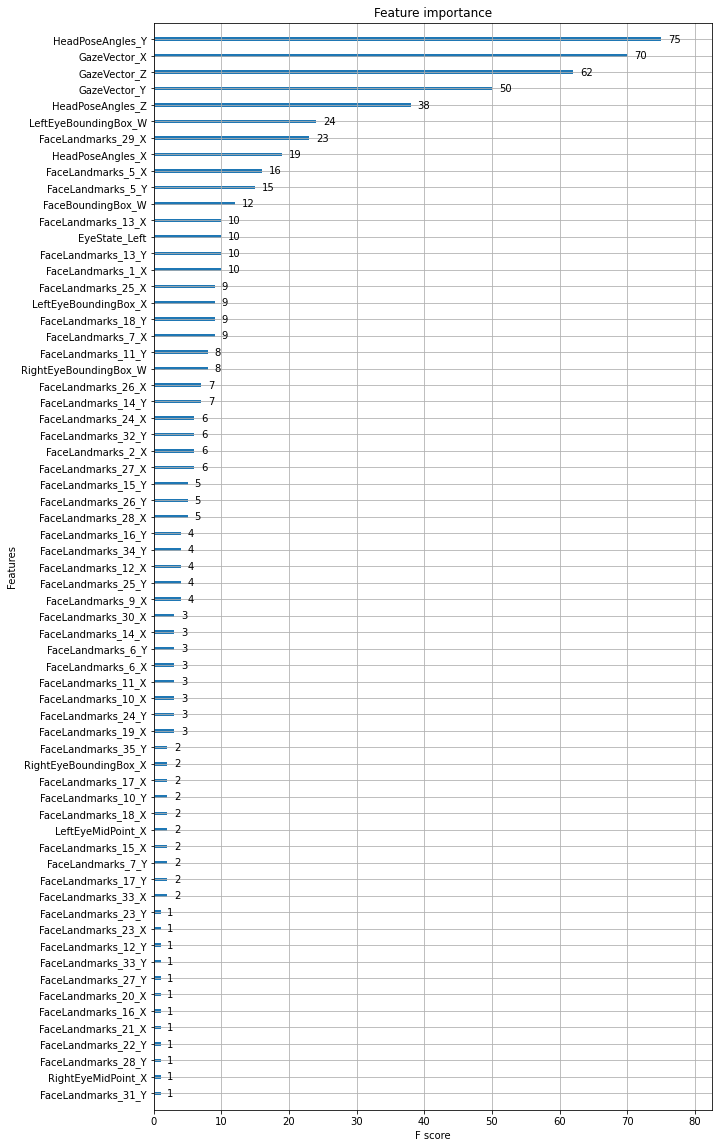

In [18]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
# plot_importance(model)
# plt.show()

fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)
plt.show()

In [19]:
!pip install graphviz

<Figure size 864x864 with 0 Axes>

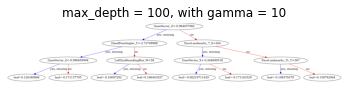

In [20]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plt.figure(figsize=(12, 12))
plot_tree(model, num_trees = 1)
plt.title("max_depth = 100, with gamma = 10")
plt.savefig("plot_tree_xgboost_norm_all_features", dpi = 300)